# Programming Exercise - Regularized Linear Regression and Bias v.s Variance

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
data = loadmat('data/ex5data1.mat')

In [3]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

y_val = data['yval']
X_val = np.c_[np.ones_like(data['Xval']), data['Xval']]

print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X val: ", X_val.shape)
print("y val: ", y_val.shape)

X train:  (12, 2)
y train:  (12, 1)
X val:  (21, 2)
y val:  (21, 1)


## Regularized Linear Regression

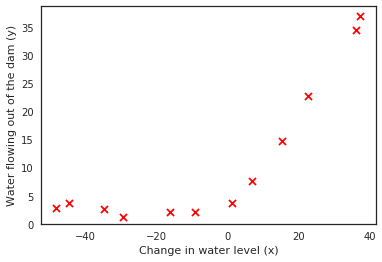

In [9]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.ylim(ymin=0)
plt.show()

### Rugularized Cost Function

In [10]:
def linear_regression(theta, X, y, reg):
    m = y.size
    h = X.dot(theta)
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return J

### Gradient Descent

In [11]:
def gradient_descent(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1, 1))
    grad = (1/m)*(X.T.dot(h-y)) + (reg/m)*(np.r_[[[0]], theta[1:].reshape(-1, 1)])
    return grad.flatten()

In [12]:
initial_theta = np.ones((X_train.shape[1], 1))
cost = linear_regression(initial_theta, X_train, y_train, 0)
gradient = gradient_descent(initial_theta, X_train, y_train, 0)
print("Cost: ", cost)
print("Gradient: ",gradient)

Cost:  303.951525554
Gradient:  [ -15.30301567  598.16741084]


In [86]:
def train_linear_regression(X, y, reg):
    #initial_theta = np.zeros((X.shape[1],1))
    initial_theta = np.array([[15],[15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(linear_regression, initial_theta, args=(X,y,reg), method=None, jac=gradient_descent, options={'maxiter':5000})
    
    return(res)

In [87]:
train = train_linear_regression(X_train, y_train, 0)
train

      fun: 1604.4002999186634
 hess_inv: array([[ 1.03142187,  0.00617881],
       [ 0.00617881,  0.001215  ]])
      jac: array([  3.42437190e-12,  -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 13.08790351,   0.36777923])

#### `Comparison: coefficients and cost obtaioned with LinearRegression in scikit-learn`

In [88]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train.ravel())
print("coefficient: ", regr.coef_)
print("Linear Regression in Scikit-learn: ", linear_regression(regr.coef_, X_train, y_train, 0))

coefficient:  [ 13.08790351   0.36777923]
Linear Regression in Scikit-learn:  1604.40029992


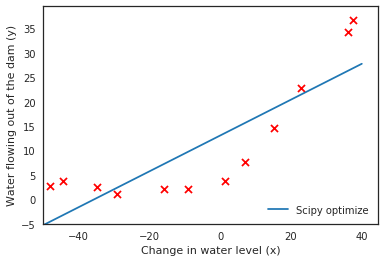

In [89]:
plt.plot(np.linspace(-50, 40), (train.x[0] + train.x[1]*np.linspace(-50, 40)), label='Scipy optimize')
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4)
plt.show()

In [90]:
def learning_curve(X, y, Xval, yval, reg):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = train_linear_regression(X[:i+1], y[:i+1], reg)
        error_train[i] = linear_regression(res.x, X[:i+1], y[:i+1], reg)
        error_val[i] = linear_regression(res.x, Xval, yval, reg)
    
    return(error_train, error_val)

In [91]:
t_error, v_error = learning_curve(X_train, y_train, X_val, y_val, 0)

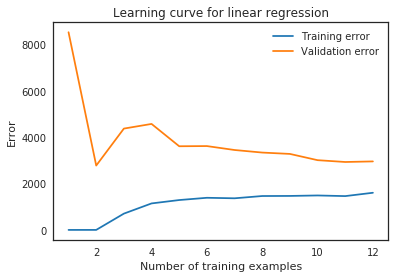

In [92]:
plt.plot(np.arange(1,13), t_error, label='Training error')
plt.plot(np.arange(1,13), v_error, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

### Polynomial regression (Scikit-learn)

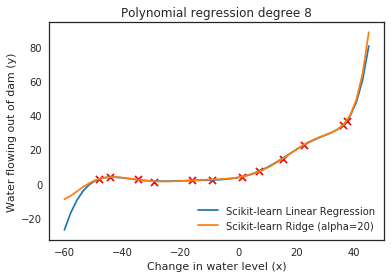

In [93]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1, 1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y_train)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y_train)

plot_x = np.linspace(-60, 45)
plot_y = regr2.intercept_ + np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1, 1)), axis=1)
plot_y_2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1, 1)), axis=1)

plt.plot(plot_x, plot_y, label="Scikit-learn Linear Regression")
plt.plot(plot_x, plot_y_2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of dam (y)")
plt.title("Polynomial regression degree 8")
plt.legend(loc=4)
plt.show()